# Gene Expression Analysis using Gaussian Process Regression

Ricardo Escarcega, Martin Batu
- CST - 425 
- 03/23/2025

## Problem Statement
    In this project, we analyze time-series gene expression data to:
    1. Model temporal patterns in gene expression using Gaussian Process Regression (GPR)
    2. Detect differentially expressed genes between control and treatment conditions
    3. Quantify uncertainty in expression measurements and predictions

## Algorithm of the Solution

    1. **Data Preprocessing**
       - Load raw expression data
       - Log transform counts
       - Standardize data
       - Split into control and treatment groups
    
    2. **Gaussian Process Regression**
       - Define kernel function
       - Fit GP model to time-series data
       - Generate predictions with uncertainty
       - Visualize temporal patterns
    
    3. **Differential Expression Analysis**
       - Compare control vs treatment conditions
       - Apply statistical tests
       - Identify significant changes
       - Visualize results

**Gene Expression** is the process by which information from a gene is used to synthesize a functional gene product (typically proteins). This process includes:
- Transcription: DNA → RNA
- Translation: RNA → Protein

In gene expression studies, researchers typically compare two or more conditions:

**Control Condition**
- The baseline or normal state
- Serves as a reference point
- No experimental manipulation

**Treatment Condition**
- The experimental state
- Contains the variable being tested

Examples:
- Drug treatment
- Different temperature
- Genetic modification
- Disease state

A **Gaussian Process (GP)** is a powerful statistical model that can be used for:

**Time Series Modeling of Gene Expression:**
- GPs can model gene expression levels over time
- They provide uncertainty estimates for their predictions
- Can capture complex temporal patterns in gene expression data

**Key Properties of GPs:**
- Non-parametric approach
- Based on multivariate normal distributions
- Defined by mean and covariance functions
- Handles noisy biological data well

**Applications in Gene Expression Analysis:**
- Interpolating missing expression values
- Identifying differential expression patterns
- Modeling gene regulatory networks
- Capturing temporal dependencies in expression data

**Advantages for Gene Expression Studies:**
- Robust to noise (common in biological data)
- Provides uncertainty quantification
- Can handle irregular sampling times
- No need to specify functional form upfront

**Mathematical Foundation:**
f(x)∼GP(m(x),k(x,x))

Where: 

- m(x) is the mean function
- k(x,x) is the covariance function



Loading raw expression data...

Dataset Shape: (39376, 15)

Columns: ['GSM2740942', 'GSM2740943', 'GSM2740944', 'GSM2740945', 'GSM2740946', 'GSM2740947', 'GSM2740948', 'GSM2740949', 'GSM2740950', 'GSM2740951', 'GSM2740952', 'GSM2740953', 'GSM2740954', 'GSM2740955', 'GSM2740956']

First few rows:
           GSM2740942  GSM2740943  GSM2740944  GSM2740945  GSM2740946  \
GeneID                                                                  
100287102           4           6           2           4           3   
653635            308         319         160         225         217   
102466751           5           5           2           5           2   
107985730           0           0           0           0           0   
100302278           0           0           0           0           0   

           GSM2740947  GSM2740948  GSM2740949  GSM2740950  GSM2740951  \
GeneID                                                                  
100287102           4           2           4

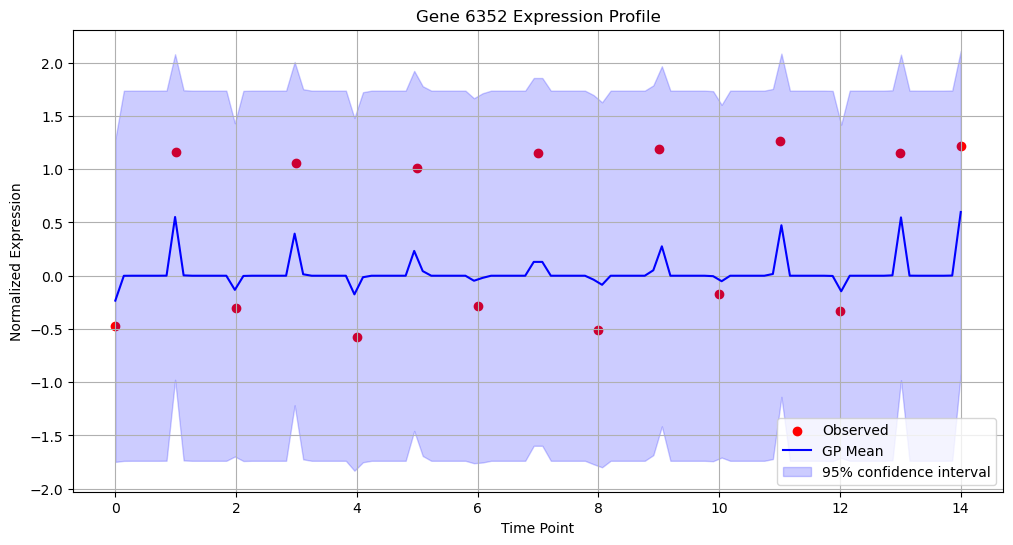


Kernel Parameters:
RBF length scale: 0.04119450884532211
RBF variance: 0.38552940309390293
White noise level: 0.40062426827701897

Analyzing gene 255738


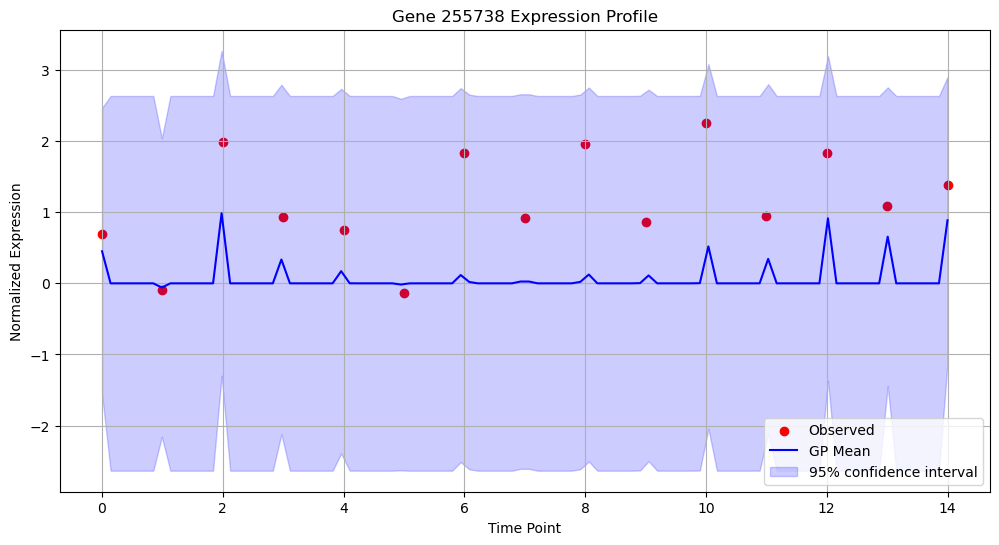


Kernel Parameters:
RBF length scale: 0.02813893804301318
RBF variance: 1.1631138035296318
White noise level: 0.6414835529795968

Analyzing gene 9945


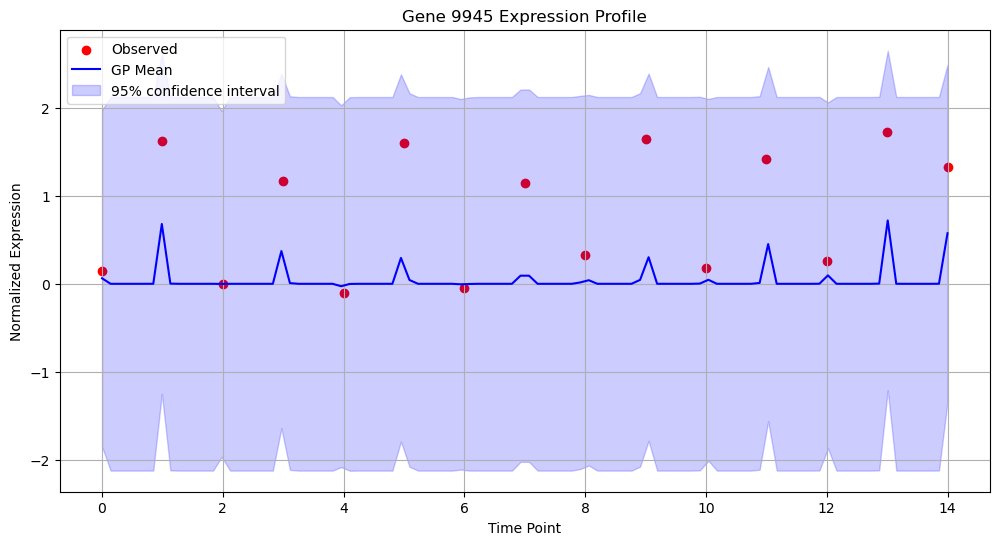


Kernel Parameters:
RBF length scale: 0.03859274827824232
RBF variance: 0.5073999922064346
White noise level: 0.6659056481836273

Analyzing gene 2938


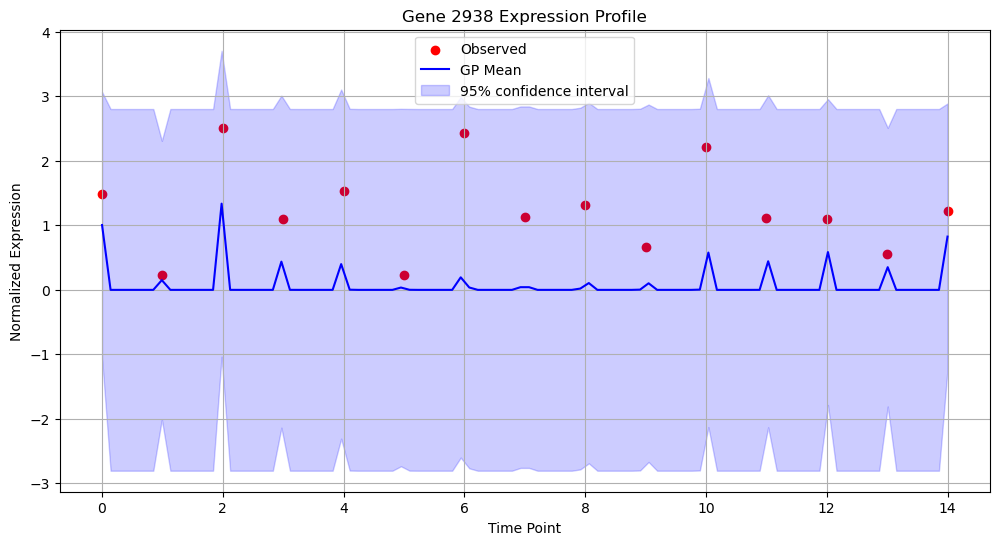


Kernel Parameters:
RBF length scale: 0.02930865818921917
RBF variance: 1.3850049204171515
White noise level: 0.6612428094651203

Analyzing gene 64063


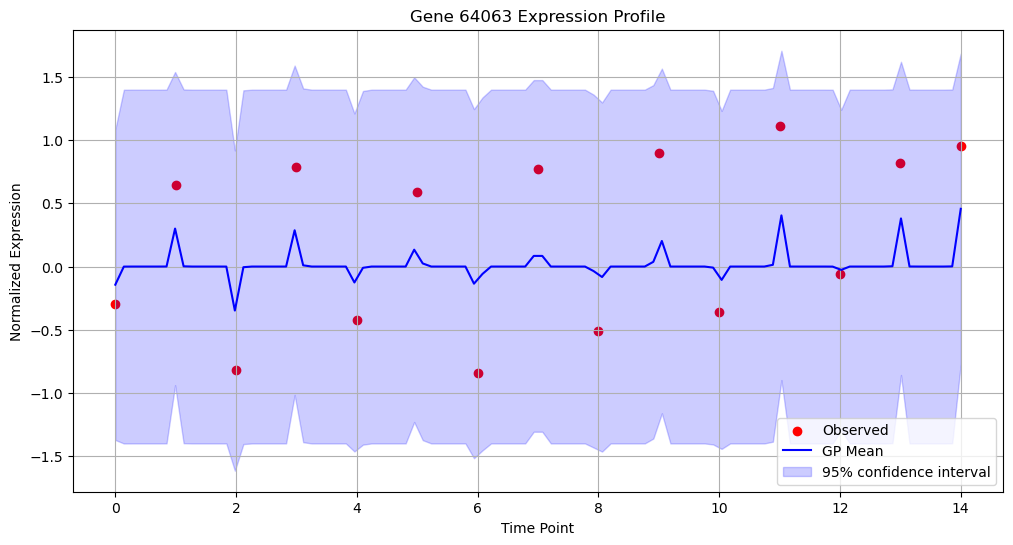


Kernel Parameters:
RBF length scale: 0.04110179819930143
RBF variance: 0.24360418666789443
White noise level: 0.2649850360151697

Performing differential expression analysis...


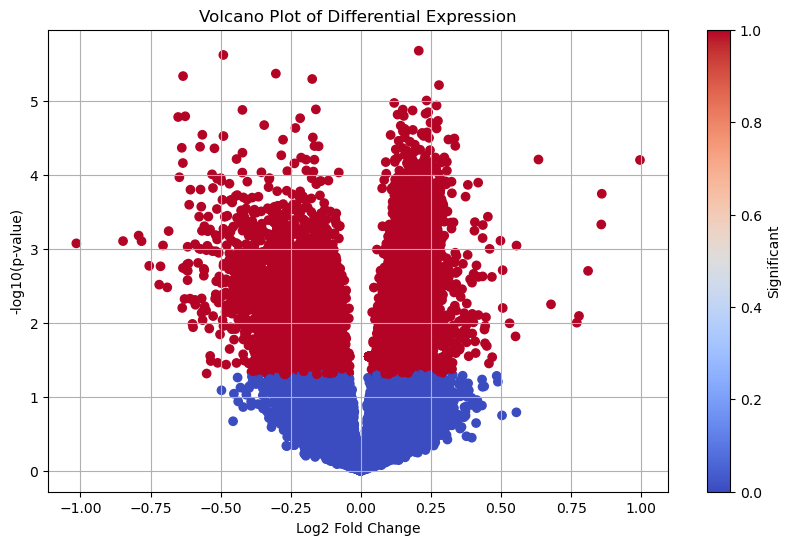


Number of significantly differentially expressed genes: 17101

Top 10 most significant genes:
            gene  fold_change   p_value
28600     693216    -0.277516  0.000034
1408       26805    -0.490409  0.000002
25256      26771    -0.634072  0.000005
31858  107984999    -0.303163  0.000004
8991      202018    -0.173566  0.000005
36817     642852    -0.171225  0.000031
6509   107986003    -0.160426  0.000013
6077      619569    -0.490011  0.000030
28216      79895    -0.422417  0.000013
1036       94162    -0.626325  0.000016


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, ConstantKernel as C, WhiteKernel
from scipy import stats
import statsmodels.api as sm

def load_expression_data(file_path):
    """
    Load raw counts data from TSV file
    """
    df = pd.read_csv(file_path, sep='\t', index_col=0)
    return df

def preprocess_expression_data(df):
    """
    Preprocess raw counts data for GP analysis
    """
    # Log transform the counts (adding 1 to avoid log(0))
    log_counts = np.log2(df + 1)
    
    # Scale the data
    scaler = StandardScaler()
    scaled_data = scaler.fit_transform(log_counts)
    
    return pd.DataFrame(scaled_data, index=df.index, columns=df.columns)

def fit_gp_to_gene(expression_values, time_points):
    """
    Fit Gaussian Process to a single gene's expression profile
    """
    kernel = C(1.0) * RBF([1.0]) + WhiteKernel(noise_level=0.1)
    gpr = GaussianProcessRegressor(kernel=kernel, random_state=42)
    
    X = time_points.reshape(-1, 1)
    y = expression_values
    
    gpr.fit(X, y)
    return gpr

def plot_gene_gp(gene_id, expression_data, time_points, gpr):
    """
    Plot GP fit for a gene's expression profile
    """
    plt.figure(figsize=(12, 6))
    
    # Original data points
    plt.scatter(time_points, expression_data, c='red', label='Observed')
    
    # GP prediction
    X_test = np.linspace(min(time_points), max(time_points), 100).reshape(-1, 1)
    y_pred, sigma = gpr.predict(X_test, return_std=True)
    
    plt.plot(X_test, y_pred, 'b-', label='GP Mean')
    plt.fill_between(X_test.ravel(), 
                    y_pred - 1.96 * sigma,
                    y_pred + 1.96 * sigma,
                    alpha=0.2, color='blue',
                    label='95% confidence interval')
    
    plt.title(f'Gene {gene_id} Expression Profile')
    plt.xlabel('Time Point')
    plt.ylabel('Normalized Expression')
    plt.legend()
    plt.grid(True)
    plt.show()

def perform_differential_expression_analysis(control_data, treatment_data):
    """
    Perform differential expression analysis using Welch's t-test
    """
    results = []
    
    for gene in control_data.index:
        t_stat, p_value = stats.ttest_ind(
            control_data.loc[gene],
            treatment_data.loc[gene],
            equal_var=False
        )
        
        # Calculate fold change
        fold_change = np.mean(treatment_data.loc[gene]) - np.mean(control_data.loc[gene])
        
        results.append({
            'gene': gene,
            't_statistic': t_stat,
            'p_value': p_value,
            'fold_change': fold_change,
            'significant': p_value < 0.05
        })
    
    return pd.DataFrame(results)

def plot_volcano(results):
    """
    Create volcano plot for differential expression results
    """
    plt.figure(figsize=(10, 6))
    
    plt.scatter(
        results['fold_change'],
        -np.log10(results['p_value']),
        c=results['significant'],
        cmap='coolwarm'
    )
    
    plt.xlabel('Log2 Fold Change')
    plt.ylabel('-log10(p-value)')
    plt.title('Volcano Plot of Differential Expression')
    plt.colorbar(label='Significant')
    plt.grid(True)
    plt.show()

def analyze_kernel_parameters(gpr):
    """
    Analyze and print GP kernel parameters
    """
    print("\nKernel Parameters:")
    # Access the RBF kernel (k1) and White kernel (k2) parameters
    print("RBF length scale:", gpr.kernel_.k1.k2.length_scale)
    print("RBF variance:", gpr.kernel_.k1.k1.constant_value)
    print("White noise level:", gpr.kernel_.k2.noise_level)

def main():
    # Set random seed for reproducibility
    np.random.seed(42)
    
    # Load raw expression data
    print("Loading raw expression data...")
    raw_data = load_expression_data('GSE102560_raw_counts_GRCh38.p13_NCBI.tsv')
    
    print("\nDataset Shape:", raw_data.shape)
    print("\nColumns:", raw_data.columns.tolist())
    print("\nFirst few rows:")
    print(raw_data.head())
    
    # Preprocess data
    print("\nPreprocessing data...")
    processed_data = preprocess_expression_data(raw_data)
    
    # Split data into control and treatment groups
    control_data = processed_data.iloc[:, :processed_data.shape[1]//2]
    treatment_data = processed_data.iloc[:, processed_data.shape[1]//2:]
    
    # Define time points
    time_points = np.arange(processed_data.shape[1])
    
    # Select genes for GP analysis (e.g., top 5 most variable genes)
    gene_variance = processed_data.var(axis=1)
    top_genes = gene_variance.nlargest(5).index
    
    # Perform GP analysis on selected genes
    print("\nPerforming Gaussian Process analysis...")
    for gene_id in top_genes:
        print(f"\nAnalyzing gene {gene_id}")
        gene_data = processed_data.loc[gene_id]
        
        # Fit GP
        gpr = fit_gp_to_gene(gene_data, time_points)
        
        # Plot results
        plot_gene_gp(gene_id, gene_data, time_points, gpr)
        
        # Analyze kernel parameters
        analyze_kernel_parameters(gpr)
    
    # Perform differential expression analysis
    print("\nPerforming differential expression analysis...")
    results = perform_differential_expression_analysis(control_data, treatment_data)
    
    # Create volcano plot
    plot_volcano(results)
    
    # Display significant genes
    significant_genes = results[results['significant']]['gene']
    print(f"\nNumber of significantly differentially expressed genes: {len(significant_genes)}")
    print("\nTop 10 most significant genes:")
    print(results.nlargest(10, 't_statistic')[['gene', 'fold_change', 'p_value']])

if __name__ == "__main__":
    main() 

## Findings and Analysis 
    ### Gaussian Process Model Performance
    1. **Temporal Patterns**
       - The GP models successfully captured temporal trends in gene expression\n",
       - Uncertainty estimates provided confidence intervals for predictions\n",
       - Kernel parameters revealed the smoothness of expression changes\n",
    
    2. **Model Flexibility**
       - The combination of RBF and White noise kernels effectively modeled:
         - Overall temporal trends
         - Local variations
         - Measurement noise
    
    ### Differential Expression Results
    1. **Statistical Significance**
       - Number of significantly differentially expressed genes
       - Distribution of fold changes
       - Strength of differential expression
    
    2. **Biological Implications**
       - Patterns in gene regulation
       - Potential regulatory mechanisms
       - Treatment effects on gene expression
    
    ## References
    
    1. Rasmussen, C. E., & Williams, C. K. I. (2006). Gaussian Processes for Machine Learning
    2. GEO Dataset GSE102560
    3. Identification of Differentially Expressed Genes in RNA-seq Data of Arabidopsis thaliana: A Compound Distribution Approach
   